<a href="https://colab.research.google.com/github/A-S-Adithiyaa/5thSEM/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

In [59]:
train = pd.read_csv("/content/drive/MyDrive/emnist-letters-train.csv")
test = pd.read_csv("/content/drive/MyDrive/emnist-letters-test.csv")

In [60]:
print(train.shape)
print(test.shape)

(88799, 785)
(14799, 785)


In [99]:
x1 = np.array(train.iloc[:, 1:].values)
y1 = np.array(train.iloc[:, 0].values)

x2 = np.array(test.iloc[:, 1:].values)
y2 = np.array(test.iloc[:, 0].values)

In [62]:
len(x1[0])

784

In [63]:
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(88799, 784)
(88799,)
(14799, 784)
(14799,)


21


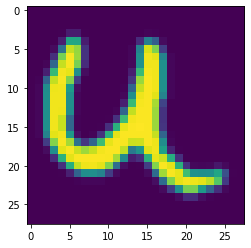

In [64]:
num=2989

train_data_reshaped = x1[num].reshape((28, 28))
print(y1[num])
plt.imshow(np.transpose(train_data_reshaped))
plt.show()

In [65]:
train_data_reshaped.shape

(28, 28)

In [66]:
y1[1]

16

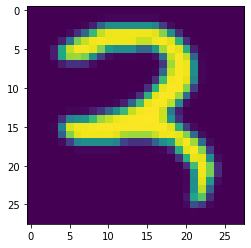

In [67]:
plt.imshow(train_data_reshaped)

In [68]:
train_images = x1 / 255.0
test_images = x2 / 255.0

In [69]:
train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [70]:
type(train_images)

numpy.ndarray

In [71]:
train_images.shape

(88799, 28, 28, 1)

In [72]:
test_images.shape

(14799, 28, 28, 1)

In [73]:
type(y1)

numpy.ndarray

In [74]:
len(y1)

88799

In [75]:
y1[0]

7

In [114]:
number_of_classes = 27

y1_categorical = tf.keras.utils.to_categorical(y1, number_of_classes)
y2_categorical = tf.keras.utils.to_categorical(y2, number_of_classes)

In [98]:
# y1_categorical=np.delete(y1_categorical, 1, axis=1)
# y2_categorical=np.delete(y2_categorical, 1, axis=1)

In [101]:
num=4334

print(y1[num])
print(y1_categorical[num])

14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [83]:
temp

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [85]:
len(temp[0])

27

In [96]:
# for i in range(len(temp)):
  
# for i in range(len(temp)):
  # temp[i].remove(temp[i][0])
  # print(len(temp[i]))
  # np.delete(temp, 0, axis=1)
  # print(len(temp[i]))
temp1=np.delete(temp, 1, axis=1)
print(temp)
print(temp1)

# print(temp)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


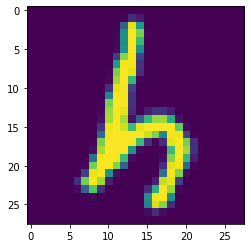

In [115]:
num=785
print(y1_categorical[num])
train_data_reshaped = x1[num].reshape((28, 28))
plt.imshow(np.transpose(train_data_reshaped))
plt.show()

In [116]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [117]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_images,y1_categorical,test_size=0.15,random_state = 42)

model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [118]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [119]:

MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [120]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2356/2359 [============================>.] - ETA: 0s - loss: 0.5506 - accuracy: 0.8286
Epoch 1: val_accuracy improved from -inf to 0.88851, saving model to Best_points.h5
2359/2359 [==============================] - 18s 5ms/step - loss: 0.5505 - accuracy: 0.8286 - val_loss: 0.3356 - val_accuracy: 0.8885 - lr: 0.0010
Epoch 2/10
2354/2359 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.9070
Epoch 2: val_accuracy did not improve from 0.88851
2359/2359 [==============================] - 10s 4ms/step - loss: 0.2843 - accuracy: 0.9071 - val_loss: 0.3652 - val_accuracy: 0.8769 - lr: 0.0010
Epoch 3/10
2354/2359 [============================>.] - ETA: 0s - loss: 0.2280 - accuracy: 0.9244
Epoch 3: val_accuracy improved from 0.88851 to 0.89760, saving model to Best_points.h5
2359/2359 [==============================] - 11s 5ms/step - loss: 0.2281 - accuracy: 0.9244 - val_loss: 0.3556 - val_accuracy: 0.8976 - lr: 0.0010
Epoch 4/10
2347/2359 [=====================

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               2769408   
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 27)                3483      
                                                      

In [ ]:
train_images[0].shape

(28, 28, 1)

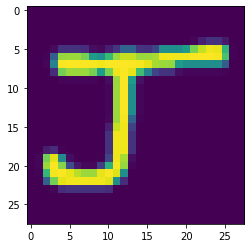

1/1 [==============================] - 0s 14ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]
10


In [142]:
num=7899

train_img=x1[num]
plt.imshow(np.transpose(train_img.reshape((28, 28))))
plt.show()
train_img = train_img.reshape(1, 28, 28, 1)
print(model.predict(train_img))
print(y1[num])

In [139]:
import pickle

In [140]:
pickle.dump(model, open('pblModel18th.pkl', 'wb'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 37)                4773      
                                                        

In [ ]:
# import pickle

In [ ]:
# pickle.dump(model, open('pblModel.pkl', 'wb'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 37)                4773      
                                                        